In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)
print(data)

        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
1       JHMZC5F37M    Kitsap        Poulsbo    WA      98370.0        2021   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
3       1N4AZ0CP5D      King        Seattle    WA      98119.0        2013   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
...            ...       ...            ...   ...          ...         ...   
130438  7SAYGDEE6P    Pierce     Gig Harbor    WA      98335.0        2023   
130439  1N4BZ1CV7N    Pierce         Tacoma    WA      98408.0        2022   
130440  5YJYGDEE8M      King        Seattle    WA      98109.0        2021   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020   
130442  5YJ3E1EA5M    Pierce       Puyallup    WA      98375.0        2021   

          Make    Model                   Electric Vehicle Type

In [14]:
# Question 1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != "Clean Alternative Fuel Vehicle Eligible"]
non_qualifying_cars_details = non_qualifying_cars[["Make", "Model", "Electric Vehicle Type"]]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_details)

Cars that do not qualify for clean alternative fuel vehicle:
          Make    Model                   Electric Vehicle Type
6         FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)
7         AUDI     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)
8         FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
11       TESLA  MODEL Y          Battery Electric Vehicle (BEV)
14        FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
...        ...      ...                                     ...
130437     BMW     530E  Plug-in Hybrid Electric Vehicle (PHEV)
130438   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130439  NISSAN     LEAF          Battery Electric Vehicle (BEV)
130440   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130442   TESLA  MODEL 3          Battery Electric Vehicle (BEV)

[69892 rows x 3 columns]


In [15]:
# Question 2: Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell_city = data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")]
tesla_cars_bothell_city_details = tesla_cars_bothell[["Model Year", "Model"]]
print("\nTESLA cars made in Bothell City:")
print(tesla_cars_bothell_city_details)


TESLA cars made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [16]:
# Question 3: Get all the cars that have an electric range of more than 100, and were made after 2015
cars_100_after_2015 = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]
cars_100_after_2015_details = cars_100_after_2015[["Make", "Model", "Electric Range"]]
print("\nCars with electric range greater than 100 and made after 2015:")
print(cars_100_after_2015_details)


Cars with electric range greater than 100 and made after 2015:
          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
12       TESLA  MODEL 3             308
13       TESLA  MODEL 3             322
...        ...      ...             ...
130417   TESLA  MODEL Y             291
130428  NISSAN     LEAF             151
130432   TESLA  MODEL Y             291
130436   TESLA  MODEL 3             215
130441   TESLA  MODEL X             293

[34066 rows x 3 columns]


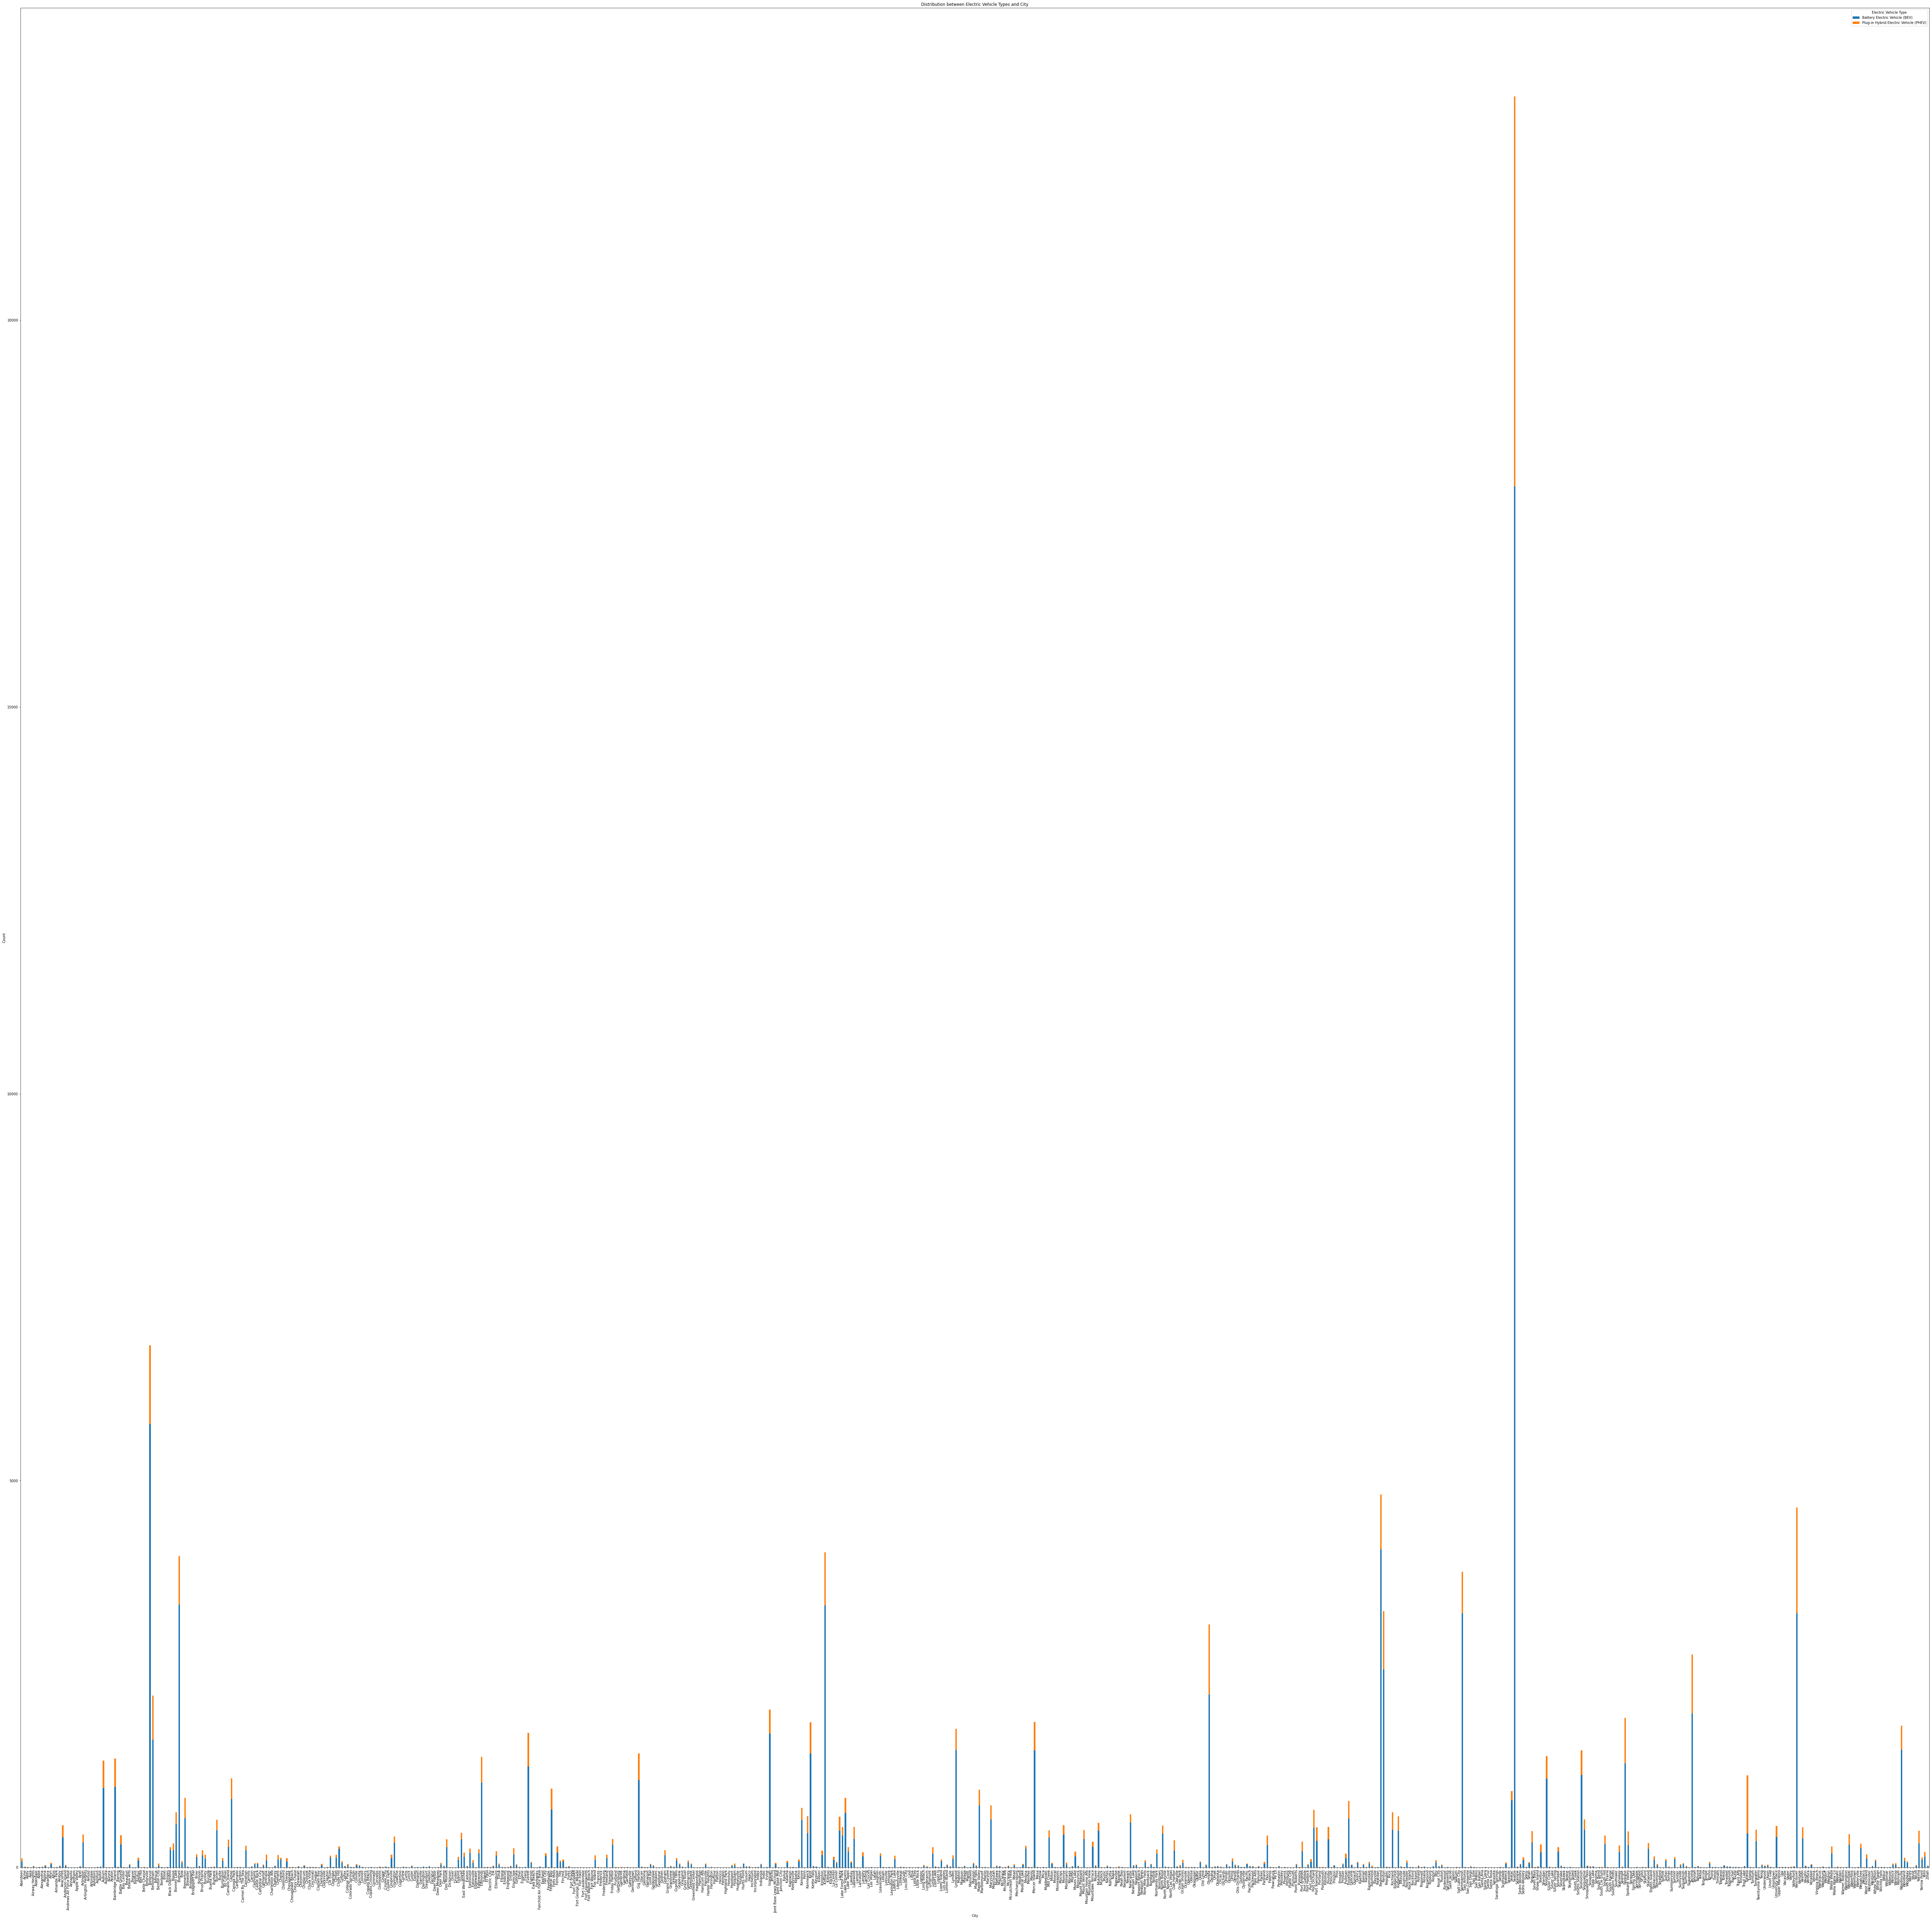

In [22]:
# Question 4: Draw plots to show the distribution between city and electric vehicle type
city_ev_type_counts = data.groupby(["City", "Electric Vehicle Type"]).size().unstack().fillna(0)
city_ev_type_counts.plot(kind="bar", stacked=True, figsize =(100, 100))
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution between Electric Vehicle Types and City")
plt.show()